In [2]:
import pandas as pd

In [3]:
df = pd.read_json('../data/articles.json')

In [4]:
df.head

<bound method NDFrame.head of                                                     title  \
0       \n\t\tTrump DC hotel falls millions short of p...   
1       \n\t\tOvernight Tech: Microsoft wants end to f...   
2       \n\t\tAnother US motorcycle company considerin...   
3       \n\t\tTrump: ‘I don’t need a summit’ with Mexi...   
4       \n\t\tUS calls emergency meeting of UN nuclear...   
...                                                   ...   
512973  Tussling Dems tumble toward deal on Biden’s ec...   
512974  Workers at federal prisons are committing some...   
512975  Middle man: Petersen poised to play key role i...   
512976  Dems edge toward pared-down spending plan to b...   
512977  Book: Trump said of virus, ‘I wanted to always...   

                                             article_text  \
0       President Trump’s Washington, D.C., hotel made...   
1       MICROSOFT CALLS OUT GOVERNMENT HACKING PRACTIC...   
2       Minnesota-based Polaris acknowledged on Friday

In [2]:
import json 

In [3]:
with open('../data/articles.json') as json_file:
    data = json.load(json_file)

In [4]:
data[0].keys()

dict_keys(['title', 'article_text', 'images', 'uuid', 'parent'])

In [5]:
# 512,000 articles
len(data)

512978

In [6]:
data[0]

{'title': '\n\t\tTrump DC hotel falls millions short of projected revenue in first months\t',
 'article_text': 'President Trump’s Washington, D.C., hotel made at least $2 million less than projected in its first two months of operation, according to House Democrats citing documents obtained from the General Services Administration (GSA).Democrats on the House Oversight and Transportation committees revealed the information in a letter sent Monday to GSA Administrator Timothy Horne, in which they asked how the agency planned to handle the alleged breach of the lease on the hotel housed in the Old Post Office, just east of the White House on Pennsylvania Avenue.A provision in the lease, signed years before Trump began his presidential campaign, prevents any federal elected official from being included on or benefiting from the lease. The Democrats claim in their letter that Trump’s ascendance to the presidency on Friday is a breach of the lease.The documents Democrats obtained from the G

In [7]:
# map article ids to the urls within them
ids_to_urls = {}
num_urls = []
for article in data:
    ids_to_urls[article['uuid']] = []
    num_urls.append(len(article['images']))
    for image in article['images']:
        ids_to_urls[article['uuid']].append(image['url'])

In [8]:
uuids = list(ids_to_urls.keys())
uuids[245009] # this article has 174 images/urls
# ids_to_urls['cf701143-3d5e-11ee-a96e-33dec8f414a2']

'cf701143-3d5e-11ee-a96e-33dec8f414a2'

In [10]:
min(num_urls)

0

In [11]:
imageless_articles = []
for key in ids_to_urls:
   if len(ids_to_urls[key]) == 0:
       imageless_articles.append(key)
       

In [12]:
# number of articles that we don't have any urls (for the associated images) so we can't determine which news source
len(imageless_articles)

10288

In [13]:
10288/512978 # 2% of the articles don't have urls so I don't think we can identify the source 

0.02005544097407686

In [14]:
# collect all of the articles that do have urls connected so that we can classify their sources
ids_with_urls = {}
for article in data:
    if len(article['images']) > 0:
        ids_with_urls[article['uuid']] = []
        for image in article['images']:
            ids_with_urls[article['uuid']].append(image['url'])

In [15]:
len(list(ids_with_urls.keys()))

502690

In [94]:
# getting a sense of the url formats and which sources we are working with
source_options = {'breitbart': 0, 'wp': 0, 'thehill': 0, 'fox': 0, 'dailycaller': 0, 
                  'cnn': 0, 'bbc': 0, 'politico': 0, 'washtimes': 0, 'npr': 0, 
                  'us-east-1.prod.boltdns': 0, 'apnews': 0, 'timesofisrael': 0}
year_options = ['2012','2013','2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

ids_and_sources = {}
year_counts = {year: 0 for year in year_options}
count_bad_urls = 0
count_articles = 0 

def split_for_year(url_val):
    url_els = url_val.split('/')
    for el in url_els:
        if el in year_options:
            year_counts[el] += 1
            return el
    return ''

for key in ids_with_urls:
    first_source = ids_with_urls[key][0]
    if "://" not in first_source:
        count_bad_urls += 1
    else:
        count_articles += 1
        source = first_source.split(".com")[0].split("://")[1]
        year = split_for_year(first_source)
        found = False
        for opt in source_options.keys():
            if opt in source:
                ids_and_sources[key] = {'source': opt, 'year': year}
                source_options[opt] +=1
                found = True
                break
        if not found:
            print(source)

        

cdn.jns.org/uploads/2019/07/IMG_9524-e1563553070554.jpg
images.jpost
www.afp
besttv232-ynet-images1-prod.cdn.it.best-tv
d25d2506sfb94s.cloudfront.net/cumulus_uploads/inlineimage/27580/Capital%20punishment.jpg
fred.stlouisfed.org/graph/fredgraph.png?g=wO0y
besttv232-ynet-images1-prod.cdn.it.best-tv
assets.publishing.service.gov.uk/government/uploads/system/uploads/image_data/file/136106/immigration-quarterly-sep21-24.png
www.telegraph.co.uk/content/dam/politics/2022/06/30/TELEMMGLPICT000301379208_trans_NvBQzQNjv4BqGhFGD3OcMvc3EVqNhTDH_xfl2tm3vdajR31FVxnIwus.jpeg?imwidth=480
ipn.gov.pl/dokumenty/zalaczniki/2/2-47836.jpg


In [95]:
# count of articles that we can deduce a source from
count_articles

488016

In [96]:
count_bad_urls # number of urls with unuseful format, cant use to deduce media source

14674

In [97]:
print(source_options)

{'breitbart': 73048, 'wp': 19, 'thehill': 9, 'fox': 32041, 'dailycaller': 65956, 'cnn': 47373, 'bbc': 332, 'politico': 149212, 'washtimes': 57591, 'npr': 52776, 'us-east-1.prod.boltdns': 8501, 'apnews': 1145, 'timesofisrael': 3}


In [98]:
year_counts

{'2012': 265,
 '2013': 798,
 '2014': 5092,
 '2015': 10757,
 '2016': 20458,
 '2017': 27648,
 '2018': 36976,
 '2019': 41688,
 '2020': 37046,
 '2021': 32205,
 '2022': 30884,
 '2023': 5533,
 '2024': 0}

In [104]:
ids_and_sources

{'73ff4208-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2017'},
 '77a0c19b-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2017'},
 '8cfe90c9-406e-11ee-a96e-33dec8f414a2': {'source': 'thehill', 'year': '2018'},
 '9cdbdae6-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2019'},
 'a3a5f190-406e-11ee-a96e-33dec8f414a2': {'source': 'thehill', 'year': '2019'},
 'ae628084-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2019'},
 'bcbc6bb2-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2020'},
 'cfb4ce29-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2020'},
 'db9f408f-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2020'},
 'e7b340f7-406e-11ee-a96e-33dec8f414a2': {'source': 'thehill', 'year': '2020'},
 'ec6e7f6d-406e-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2021'},
 'f859b52b-406e-11ee-a96e-33dec8f414a2': {'source': 'thehill', 'year': '2021'},
 '07c789ee-406f-11ee-a96e-33dec8f414a2': {'source': 'wp', 'year': '2021'},
 '3b0

In [99]:
import matplotlib.pyplot as plt

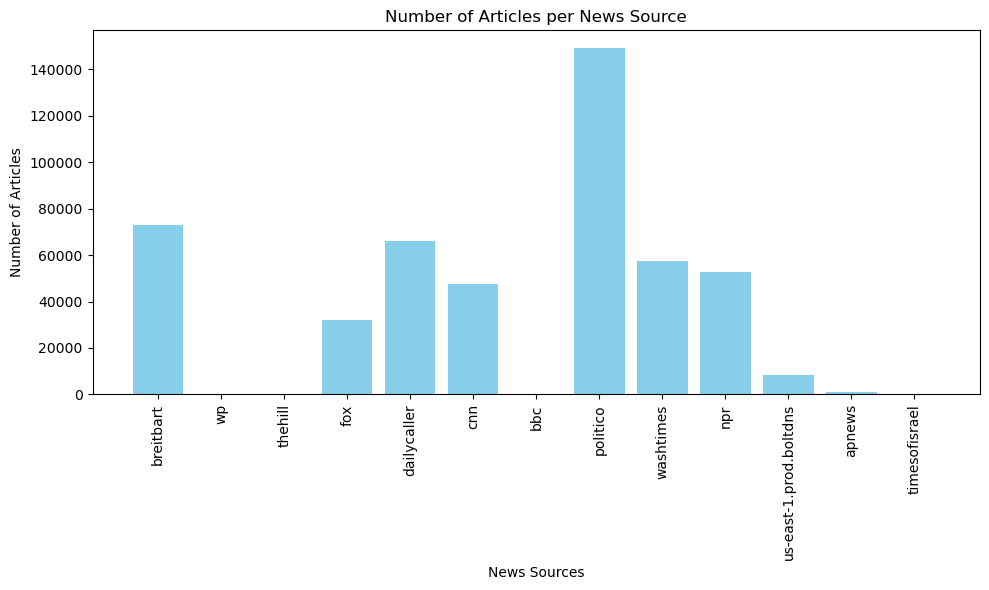

In [100]:
# Extract values and labels
values = list(source_options.values())
labels = list(source_options.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('News Sources')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per News Source')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

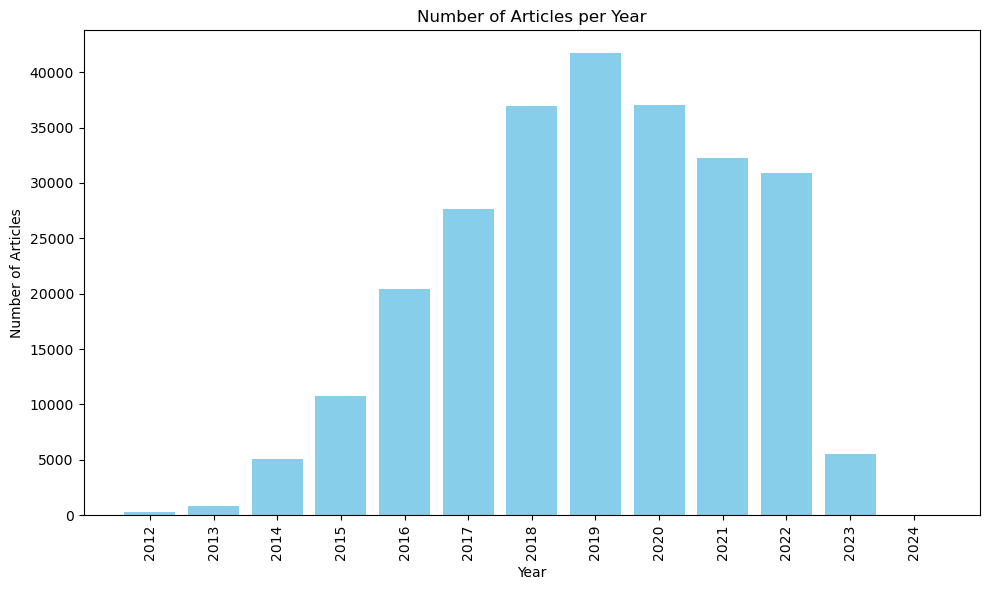

In [106]:
# Extract values and labels
values = list(year_counts.values())
labels = list(year_counts.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [103]:
from math import log
article_lens = []
articles_with_no_text = []
all_article_lens = []
for article in data:
    ids_and_sources['article_text'] = article['article_text']
    ids_and_sources['title'] = article['title']
    article_length  = len(article['article_text'])
    all_article_lens.append(article_length)
    if article_length == 0:
        articles_with_no_text.append(article['uuid'])
    else:
        if article_length > 100000:
            print(article_length)
        else:
            article_lens.append(article_length)

102133
102133
102133
153342
183817
181601
118502
119163
124217
409691
126329
114166
131840
119163
124323
179746
117260


In [76]:
# there are 1225 articles with no text in them (may have been cartoons or other types of content)
len(articles_with_no_text)

1225

In [86]:
# the average article length is 4285
sum(all_article_lens)/len(all_article_lens)

4285.521158802132

In [73]:
# the longest article length is 409691
max(all_article_lens)

409691

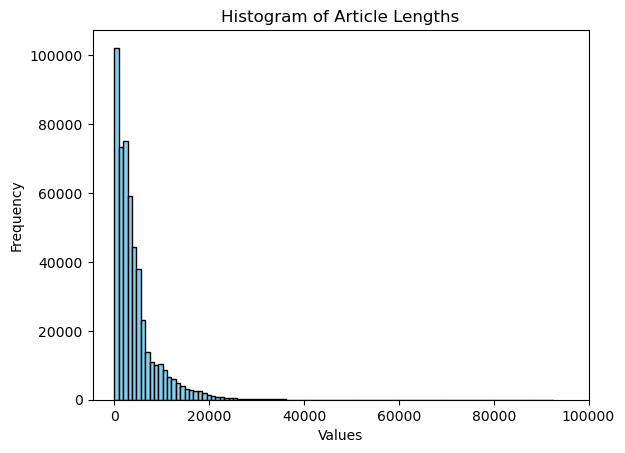

In [82]:
# Plotting the histogram
plt.hist(article_lens, bins=100, color='skyblue', edgecolor='black')
plt.xlim(right=100000)
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Article Lengths')

# Displaying the plot
plt.show()

In [109]:
# write out cleaned up dataset
with open("../data/cleaned_articles.json", "w") as fp:
    json.dump(ids_and_sources , fp) 